In [2]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [6]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [7]:
df.shape

(1338, 7)

In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

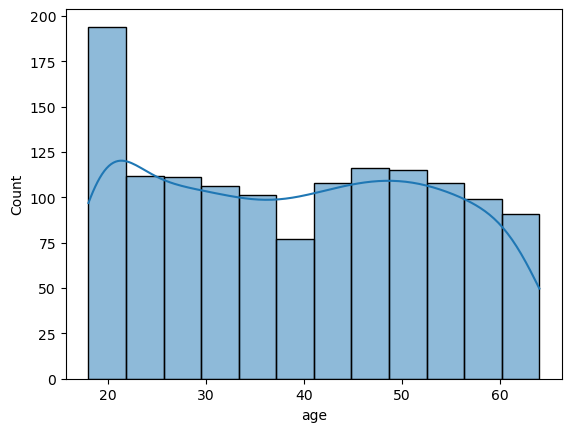

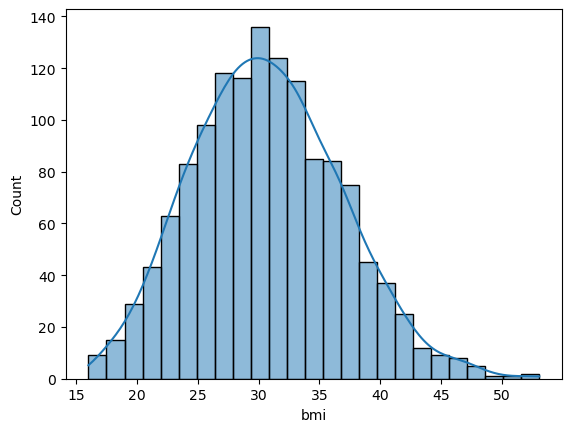

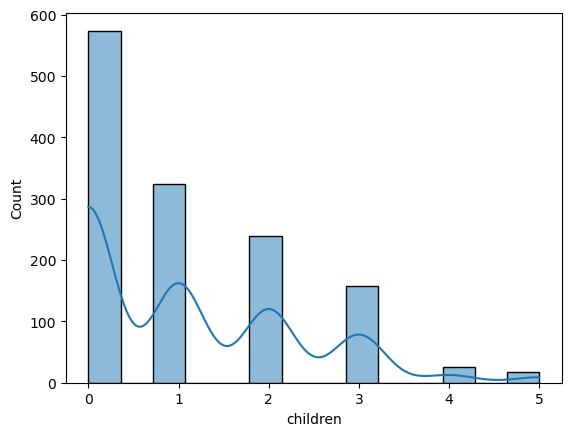

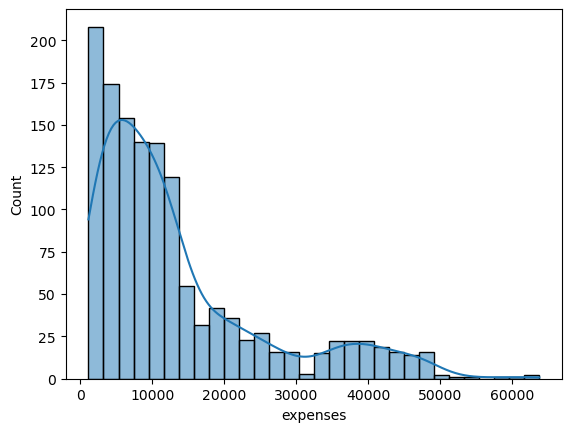

In [12]:
for i in numerical_features:
    sns.histplot(data=df , x=i ,kde=True )
    plt.show()

<AxesSubplot:>

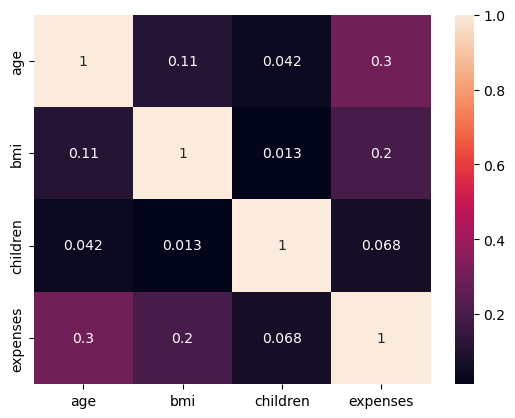

In [13]:
sns.heatmap(df.corr(), annot=True)

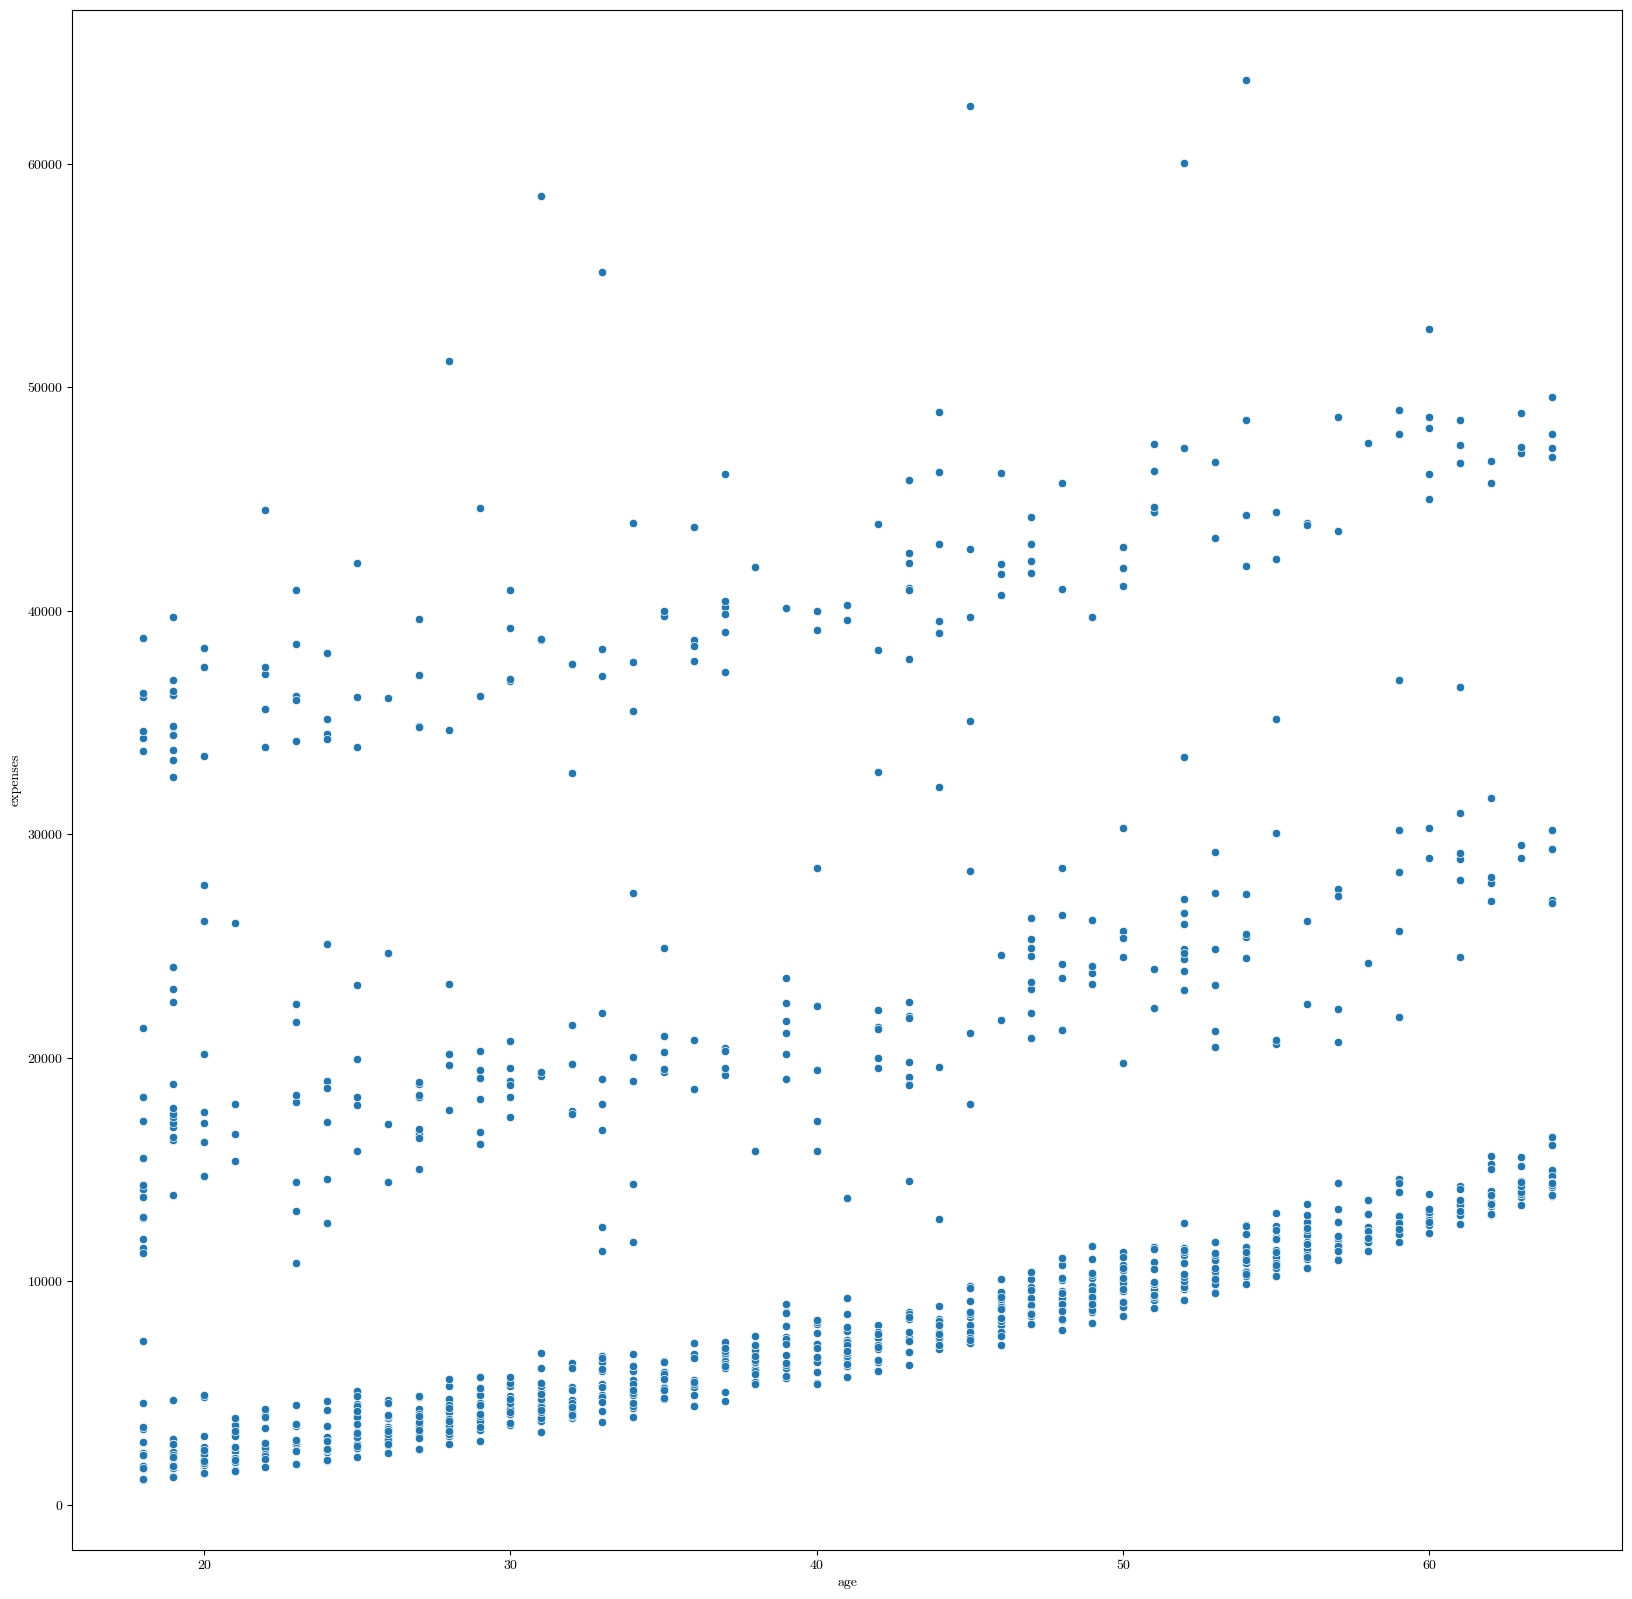

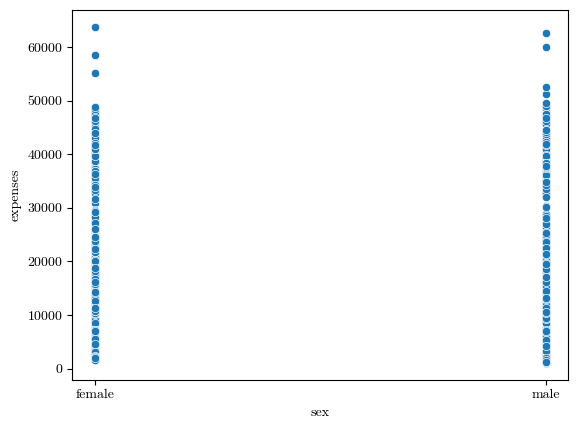

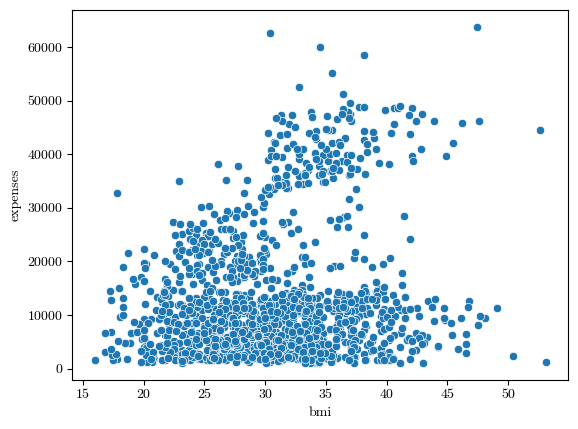

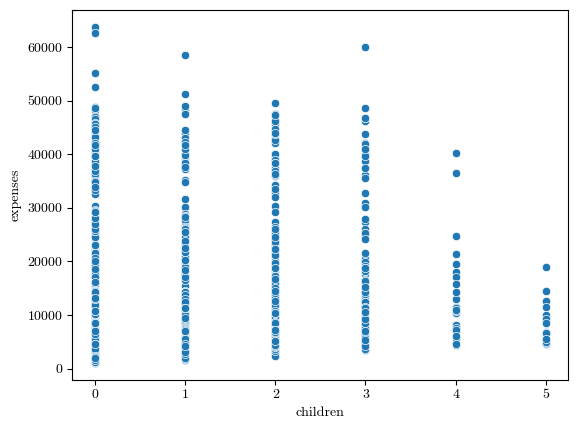

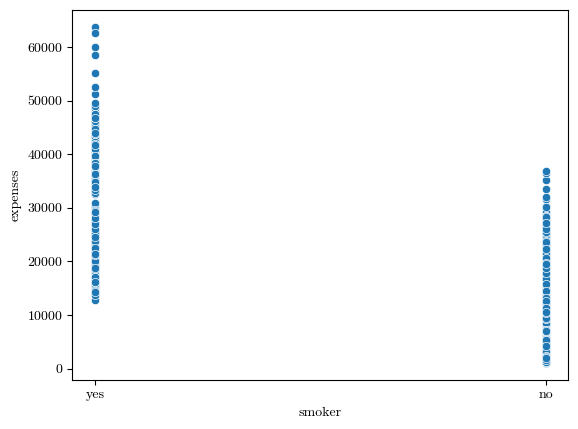

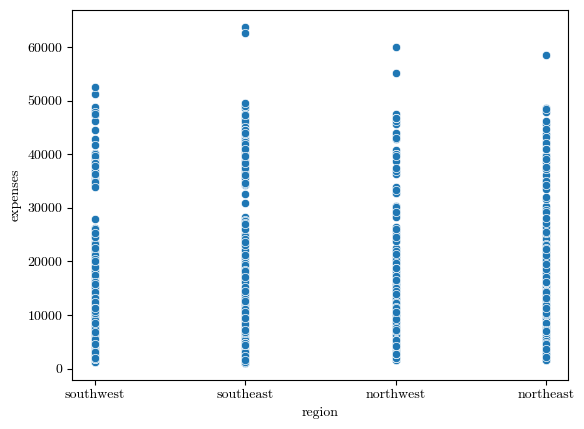

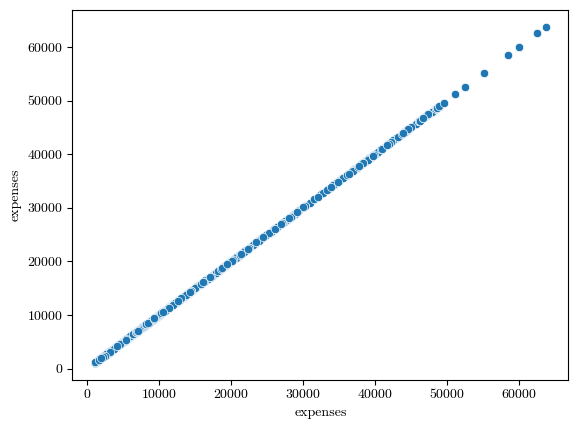

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plot

mpl.rc('font',family = 'serif', serif = 'cmr10')
import seaborn as sns
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')


for column in df.columns:
    sns.scatterplot(x=df[column], y=df['expenses'])
    plot.xlabel(column,fontsize=10)
    plot.show()

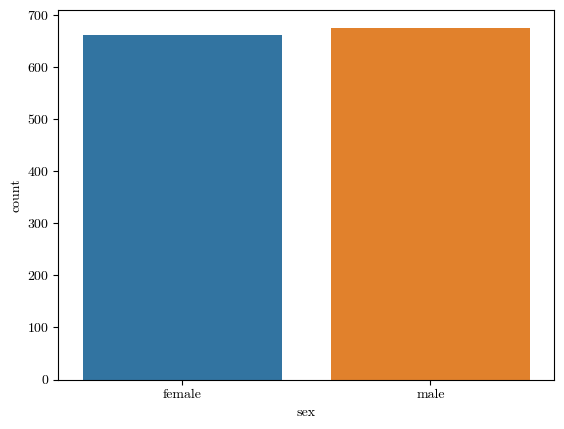

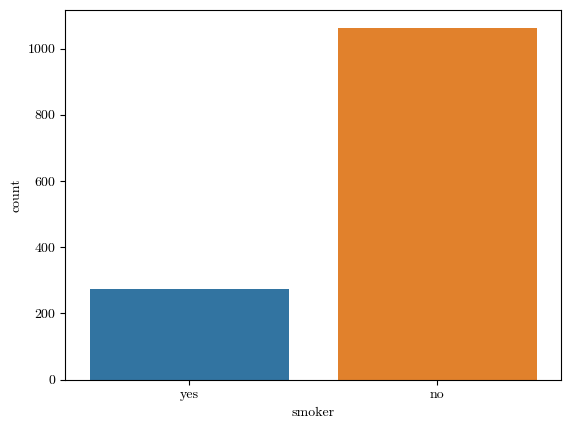

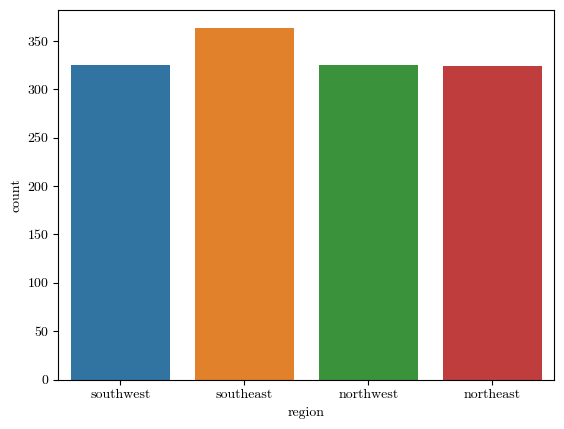

In [15]:
for i in categorical_features:
    
    sns.countplot(data=df , x=i)
    plt.show()

In [16]:
df.groupby('smoker')['expenses'].max()

smoker
no     36910.61
yes    63770.43
Name: expenses, dtype: float64

In [17]:
df.groupby('sex')['expenses'].max()

sex
female    63770.43
male      62592.87
Name: expenses, dtype: float64

In [18]:
df.groupby('region')['expenses'].max()

region
northeast    58571.07
northwest    60021.40
southeast    63770.43
southwest    52590.83
Name: expenses, dtype: float64

In [19]:
df.groupby(['bmi','expenses']).max()

age     sex  children smoker     region
bmi  expenses                                         
16.0 1694.80    18    male         0     no  northeast
16.8 3167.46    21  female         1     no  northeast
     6640.54    38    male         2     no  northeast
17.2 14455.64   26  female         2    yes  northeast
17.3 3732.63    28  female         0     no  northeast
...            ...     ...       ...    ...        ...
48.1 9432.93    46  female         2     no  northeast
49.1 11381.33   58    male         0     no  southeast
50.4 2438.06    23    male         1     no  southeast
52.6 44501.40   22    male         1    yes  southeast
53.1 1163.46    18    male         0     no  southeast

[1337 rows x 5 columns]

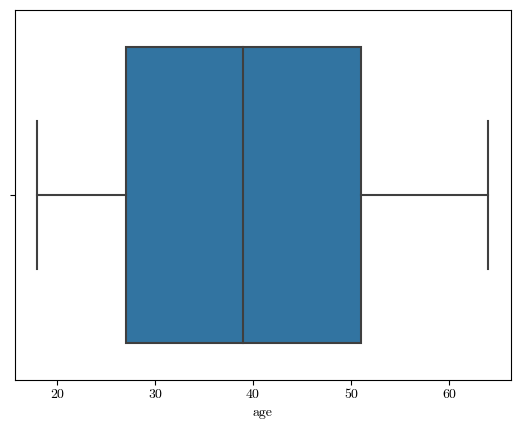

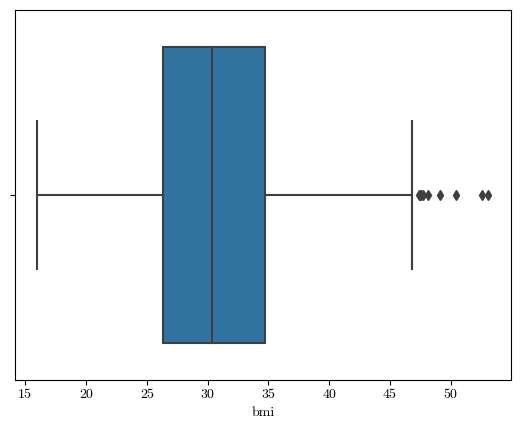

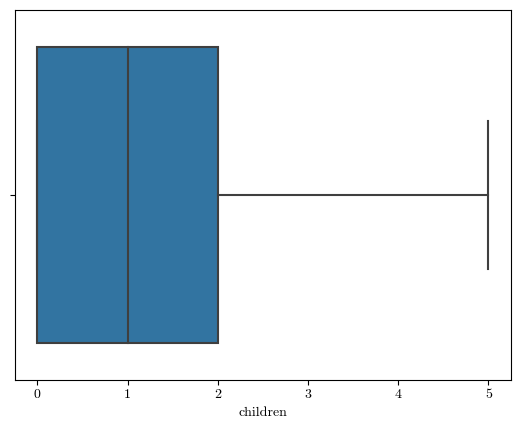

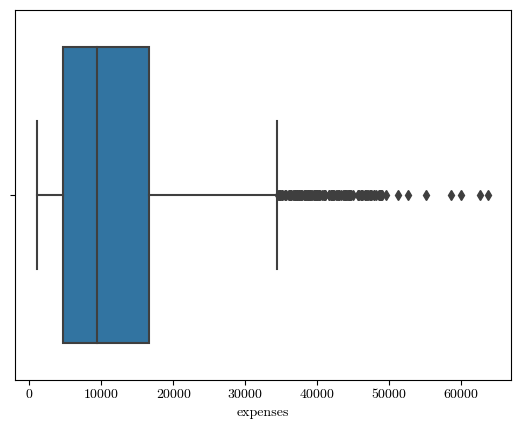

In [20]:
for i in numerical_features:

    sns.boxplot(data=df , x=i)
    plt.show()

In [21]:
X = df.drop(labels=['expenses'],axis=1)
Y = df.expenses

In [22]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)
numerical_cols = X.select_dtypes(exclude='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
num_pipeline= Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

##Categorical Pipeline

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
    ('scaler',StandardScaler())
    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
X_train.shape

(936, 11)

In [31]:
y_train.shape

(936,)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn import tree

In [33]:
df_random= RandomForestRegressor(n_estimators=15)
df_random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15)

In [34]:
df_random.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1405787148),
 DecisionTreeRegressor(max_features=1.0, random_state=1532690536),
 DecisionTreeRegressor(max_features=1.0, random_state=51463336),
 DecisionTreeRegressor(max_features=1.0, random_state=1978983706),
 DecisionTreeRegressor(max_features=1.0, random_state=1178180071),
 DecisionTreeRegressor(max_features=1.0, random_state=475995291),
 DecisionTreeRegressor(max_features=1.0, random_state=318516951),
 DecisionTreeRegressor(max_features=1.0, random_state=1705715104),
 DecisionTreeRegressor(max_features=1.0, random_state=329229693),
 DecisionTreeRegressor(max_features=1.0, random_state=1787922079),
 DecisionTreeRegressor(max_features=1.0, random_state=992391118),
 DecisionTreeRegressor(max_features=1.0, random_state=501805110),
 DecisionTreeRegressor(max_features=1.0, random_state=1978324870),
 DecisionTreeRegressor(max_features=1.0, random_state=980322710),
 DecisionTreeRegressor(max_features=1.0, random_state=1849184576)]

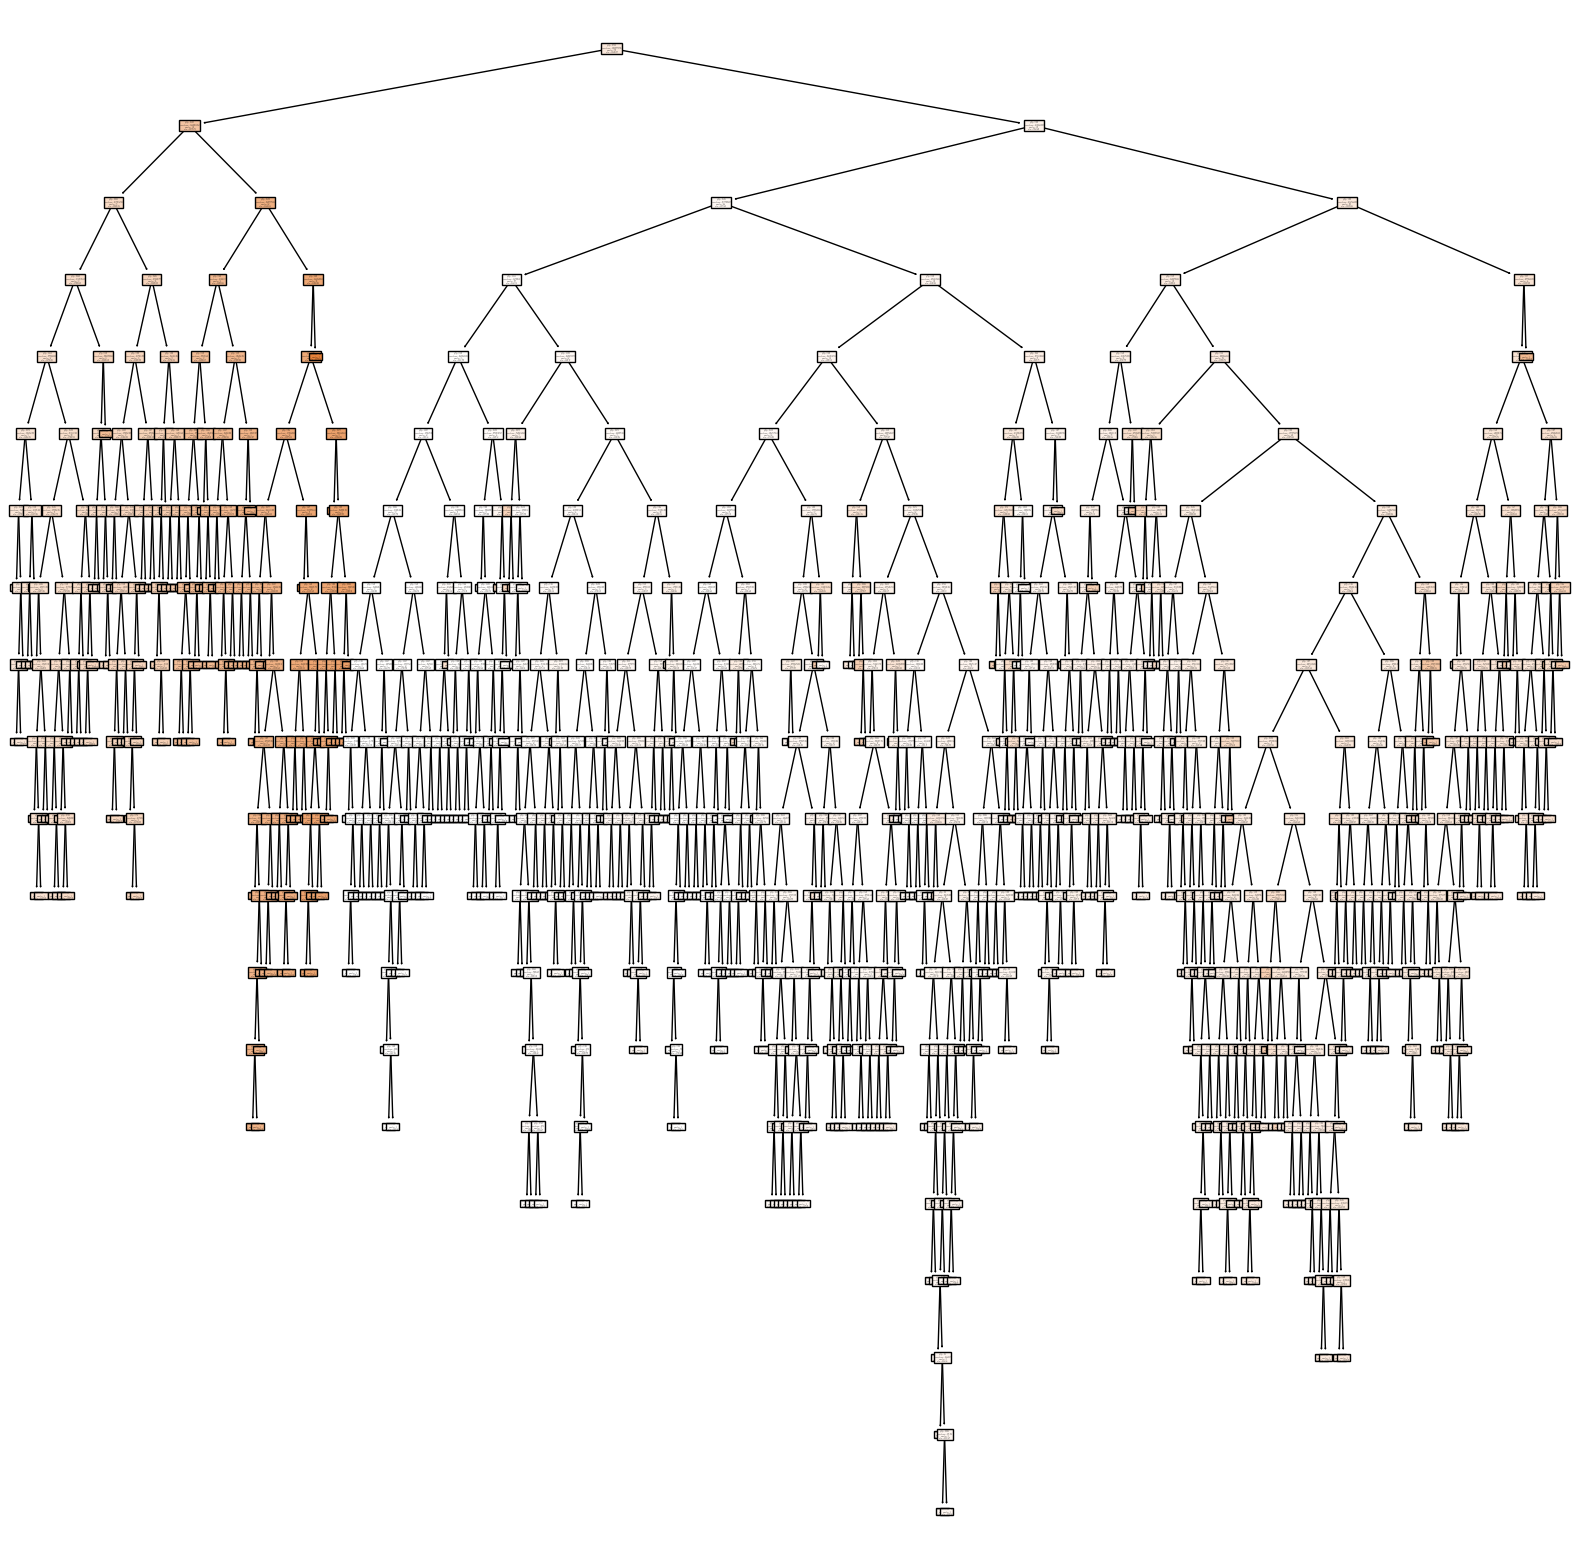

In [35]:
plt.figure(figsize= (20,20))
for i in df_random.estimators_:
    tree.plot_tree(i,filled=True)

In [36]:
df_random.score(X_test,y_test) 

0.8103127935633284

In [56]:
y_pred = df_random.predict(X_test)

In [57]:
y_pred

array([41969.54933333,  4136.77266667,  5310.87      , 17173.928     ,
       14058.104     ,  8167.43933333,  1880.63933333, 11108.93533333,
       46195.56466667, 15698.734     ,  6811.4       ,  9727.4       ,
       42842.434     , 17902.85933333,  3528.96066667, 26414.05666667,
        8846.86      , 11603.93933333, 18953.832     , 11085.43066667,
        1636.05066667,  6041.54333333,  9070.34266667, 14055.24733333,
       24977.53733333, 46681.34      , 20097.60333333,  5389.18466667,
        7248.20733333, 14632.86066667, 11181.768     , 38991.56      ,
        3730.224     , 13659.57066667, 13501.77533333,  6282.078     ,
        2176.096     ,  6774.786     ,  1632.354     ,  7562.67066667,
        7454.38666667, 24280.10466667,  2778.09866667, 11984.75466667,
        7071.03266667, 39227.74933333,  7869.10733333,  1137.57266667,
        6184.08133333,  5114.624     ,  7869.094     ,  9249.104     ,
       12277.01066667,  2021.70866667,  7270.22266667, 11929.02066667,
      

In [43]:
grid_param={
    'n_estimators':[5,10,15,20,25],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth':range(10),
    'min_samples_leaf':range(10)
}

In [44]:
grid_search = GridSearchCV(param_grid= grid_param , estimator= df_random, cv=10 , n_jobs=10, verbose=1)

In [45]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3800 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packa

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=15), n_jobs=10,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 15, 20, 25]},
             verbose=1)

In [46]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'n_estimators': 25}

In [47]:
df_best = RandomForestRegressor(criterion= 'friedman_mse',
 max_depth=6,
 min_samples_leaf=8,
 n_estimators=25)

In [48]:
df_best.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=6, min_samples_leaf=8,
                      n_estimators=25)

In [51]:
df_best.score(X_test,y_test)

0.8456133810038209

[Text(0.623015873015873, 0.9285714285714286, 'x[6] <= 0.722\nfriedman_mse = 155476207.12\nsamples = 580\nvalue = 13435.413'),
 Text(0.3888888888888889, 0.7857142857142857, 'x[0] <= 0.259\nfriedman_mse = 34647082.588\nsamples = 451\nvalue = 8044.598'),
 Text(0.20634920634920634, 0.6428571428571429, 'x[0] <= -1.155\nfriedman_mse = 17205409.081\nsamples = 250\nvalue = 4761.045'),
 Text(0.11904761904761904, 0.5, 'x[2] <= -0.505\nfriedman_mse = 5740831.208\nsamples = 80\nvalue = 2410.851'),
 Text(0.06349206349206349, 0.35714285714285715, 'x[4] <= 0.006\nfriedman_mse = 1083352.491\nsamples = 56\nvalue = 1913.209'),
 Text(0.031746031746031744, 0.21428571428571427, 'x[1] <= 0.455\nfriedman_mse = 2009038.952\nsamples = 30\nvalue = 2159.603'),
 Text(0.015873015873015872, 0.07142857142857142, 'friedman_mse = 81987.048\nsamples = 21\nvalue = 1978.695'),
 Text(0.047619047619047616, 0.07142857142857142, 'friedman_mse = 6606818.347\nsamples = 9\nvalue = 2618.831'),
 Text(0.09523809523809523, 0.214285

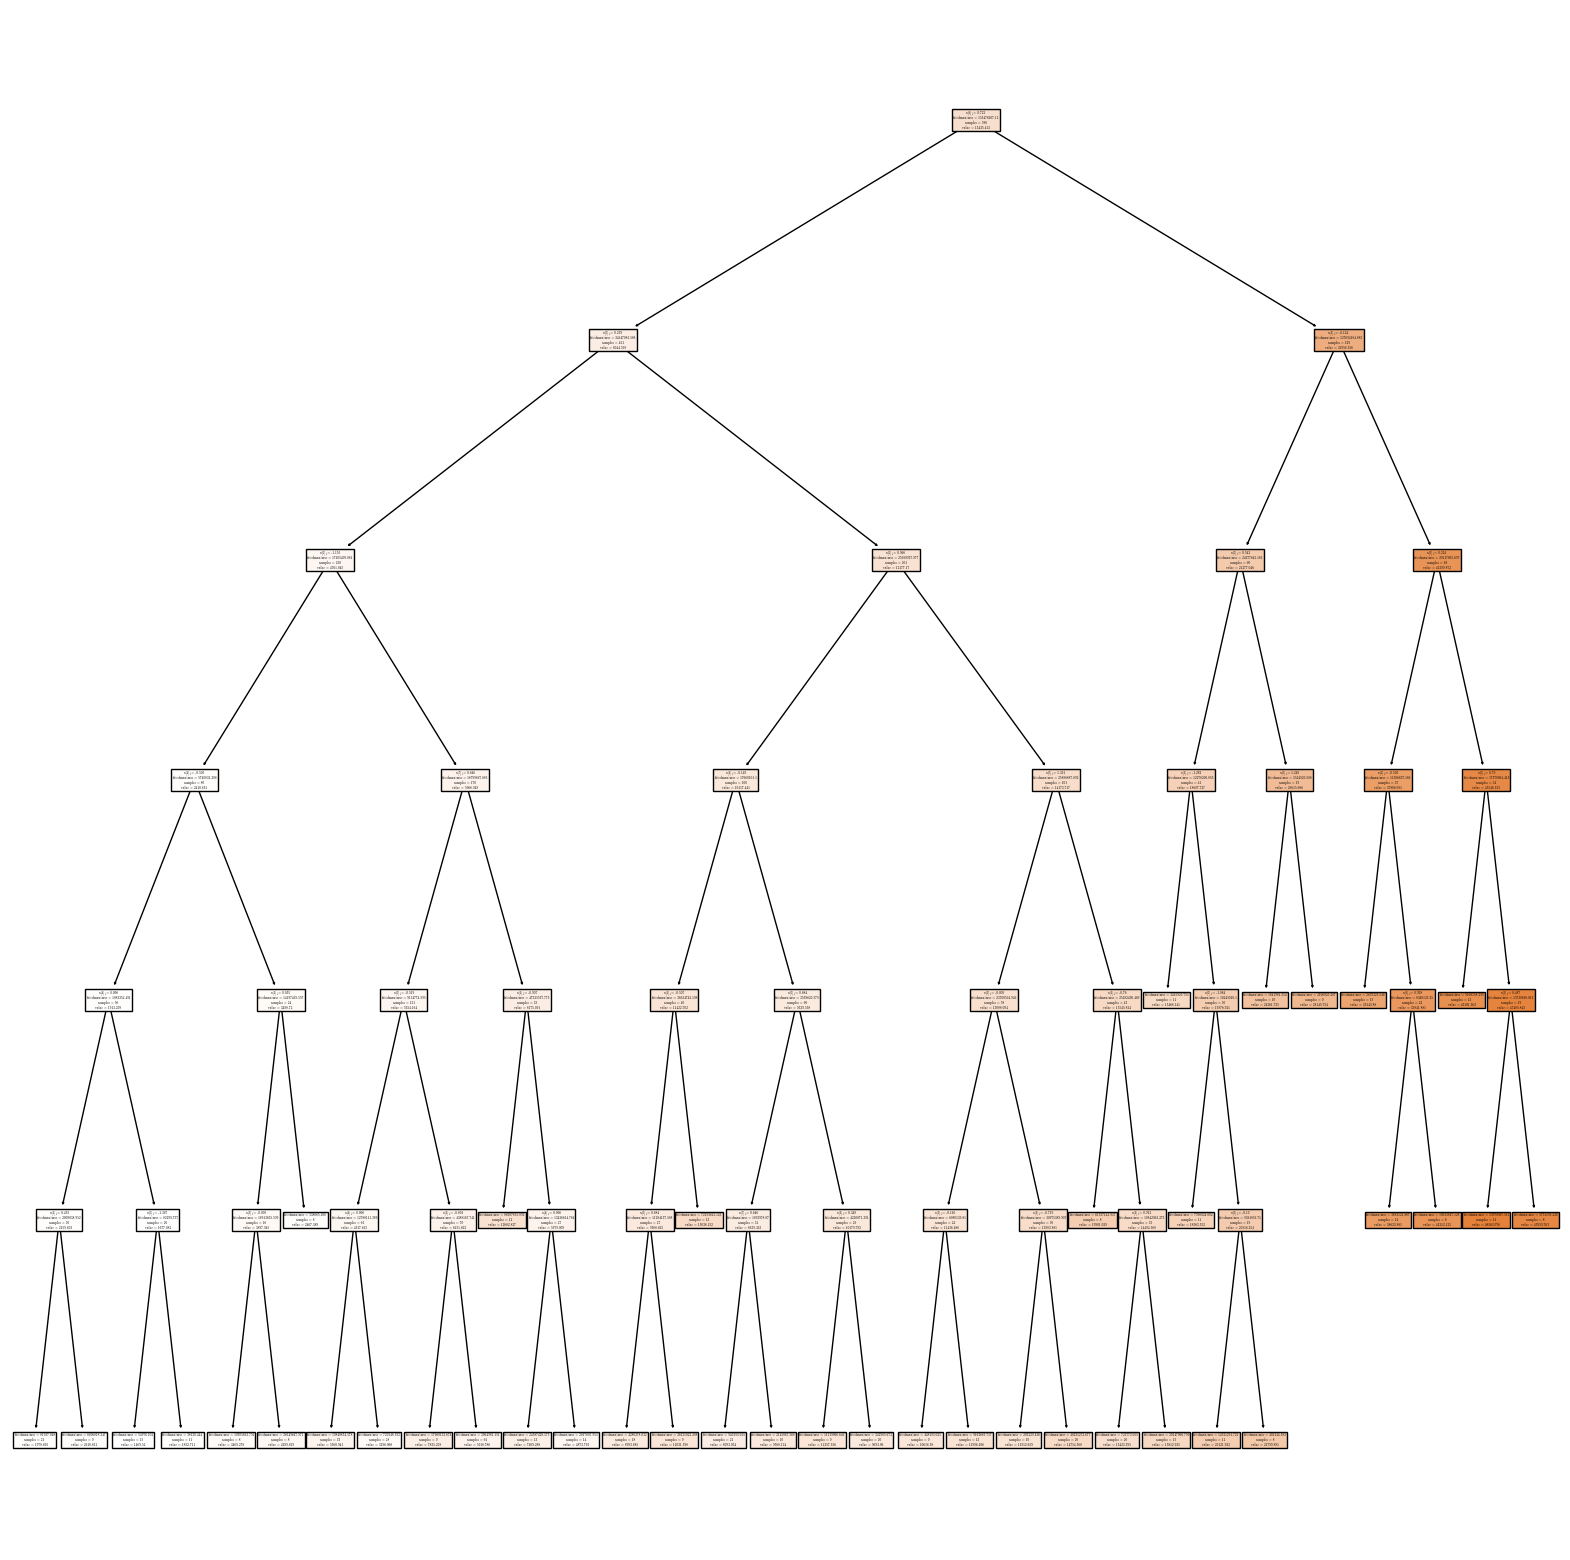

In [52]:
plt.figure(figsize= (20,20))
tree.plot_tree(df_best.estimators_[0],filled=True)

In [58]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [59]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred=regression.predict(X_test)


In [61]:
r2_score(y_test,y_pred)

0.7634600083184502

In [62]:
models={
    'LinearRegression':LinearRegression(),
    'L1_regularization':Lasso(),
    'L2_regularization':Ridge(),
    'ElasticNet':ElasticNet()
}


import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
for i in list(models.values()):
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    mae,rmse,r2_square= evaluate_model(y_test,y_pred)

    print(f"Model: {i}")
    print(f"mae: {mae}, rmse: {rmse}, r2_score: {r2_square}")

Model: LinearRegression()
mae: 4027.8388954575876, rmse: 5855.028195827358, r2_score: 0.7634600083184502
Model: Lasso()
mae: 4028.597841700071, rmse: 5855.109785309964, r2_score: 0.7634534159300421
Model: Ridge()
mae: 4028.7131234208755, rmse: 5854.951527799287, r2_score: 0.7634662029721331
Model: ElasticNet()
mae: 4523.894845989978, rmse: 6337.585597006631, r2_score: 0.7228631529882958
